개발자를 희망하는 죠르디가 카카오에 면접을 보러 왔습니다.

코로나 바이러스 감염 예방을 위해 응시자들은 거리를 둬서 대기를 해야하는데 개발 직군 면접인 만큼

아래와 같은 규칙으로 대기실에 거리를 두고 앉도록 안내하고 있습니다.

1. 대기실은 5개이며, 각 대기실은 5x5 크기입니다.
2. 거리두기를 위하여 응시자들 끼리는 맨해튼 거리가 2 이하로 앉지 말아 주세요.
3. 단 응시자가 앉아있는 자리 사이가 파티션으로 막혀 있을 경우에는 허용합니다.

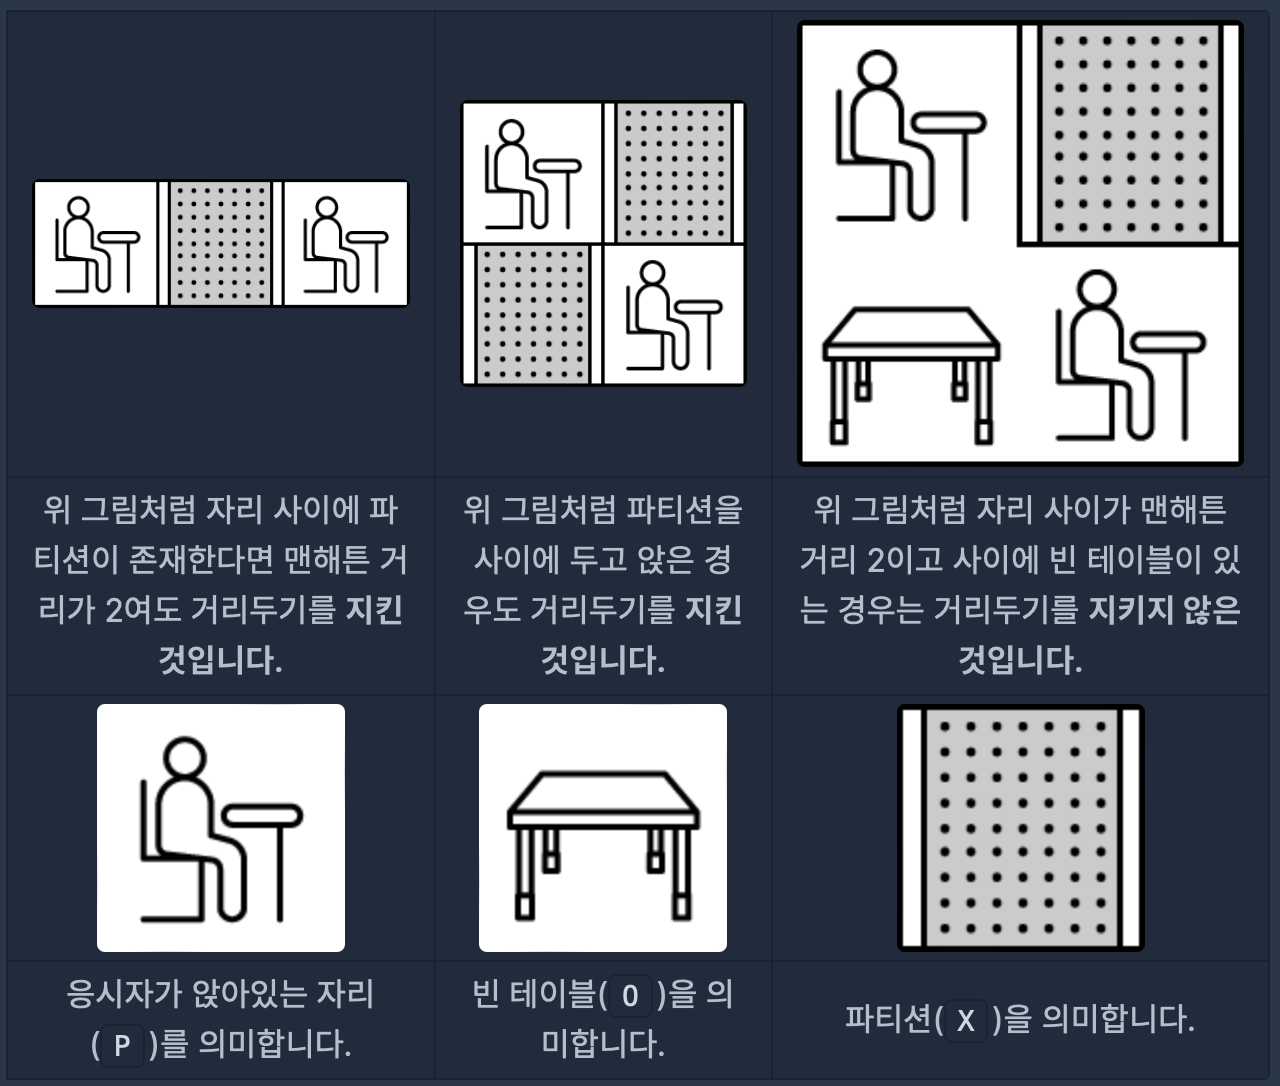

5개의 대기실을 본 죠르디는 각 대기실에서 응시자들이 거리두기를 잘 기키고 있는지 알고 싶어졌습니다. 

자리에 앉아있는 응시자들의 정보와 대기실 구조를 대기실별로 담은 2차원 문자열 배열 places가 매개변수로 주어집니다. 

각 대기실별로 거리두기를 지키고 있으면 1을, 한 명이라도 지키지 않고 있으면 0을 배열에 담아 return 하도록 solution 함수를 완성해 주세요.

In [7]:
places = [["POOOP", "OXXOX", "OPXPX", "OOXOX", "POXXP"], 
          ["POOPX", "OXPXP", "PXXXO", "OXXXO", "OOOPP"], 
          ["PXOPX", "OXOXP", "OXPOX", "OXXOP", "PXPOX"], 
          ["OOOXX", "XOOOX", "OOOXX", "OXOOX", "OOOOO"], 
          ["PXPXP", "XPXPX", "PXPXP", "XPXPX", "PXPXP"]]


from collections import deque

def find_p(place):

    p_list = []

    for i in range(5):

        for j in range(5):

            if place[i][j] == "P":

                p_list.append((i,j))

    return p_list

def bfs(place):

    dx = [-1,0,0,1]
    dy = [0,1,-1,0]

    p_list = find_p(place)
    
    if len(p_list) == 0: return 1

    for start_x, start_y in p_list:

        dq = deque([(start_x,start_y)])

        # 각 시작지점마다 생각하면 되니 For문에서 해당 리스트 설정
        visited = [[0 for i in range(5)] for j in range(5)] 
        distance = [[0 for i in range(5)] for j in range(5)] 
        visited[start_x][start_y] = 1

        while dq:

            x,y = dq.popleft()

            for i in range(4):

                n_x = x + dx[i]
                n_y = y + dy[i]
 
                if (0 <= n_x <= 4) and (0 <= n_y <= 4) and visited[n_x][n_y] == 0:

                    if place[n_x][n_y] == 'O': # 다음 이동 좌표가 빈 자리인 경우

                        dq.append((n_x,n_y)) 
                        visited[n_x][n_y] = 1 # 방문 처리
                        distance[n_x][n_y] = distance[x][y] + 1 # 거리에 따라 준수 여부가 갈리므로 계산해줌
                    
                    elif place[n_x][n_y] == 'P' and distance[x][y] <= 1: # 다음 이동 좌표가 사람인데 거리가 2이하면
                        return 0 # 거리두기 준수X
                    
    return 1

def solution(places):

    answer = [bfs(p) for p in places]

    return answer

solution(places)

[1, 0, 1, 1, 1]